In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud=pd.read_csv(r'C:\Users\poorn\OneDrive\Documents\ExcelR\Asssignment\Assign_15_Random Forest\Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Checking for null values
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
# Checking the information about Data Frame
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
# Dropping the column
fraud_check1 = fraud.drop(['City.Population'], axis = 1)
fraud_check1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [6]:
# Define the target variable according to the given problem statement

In [8]:
y1=np.empty(600, dtype=object)
i=0

for value in fraud_check1['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1 

In [9]:
t1=pd.DataFrame(y1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [12]:
# Merging the 2 Variables Data into 1
fraud_check2 = pd.concat([fraud_check1,t1],axis=1)
fraud_check2.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good


In [10]:
# Checking the correalation of the result Dataset
fraud_check2.corr()

,Taxable.Income,Work.Experience
Taxable.Income,1.000000,-0.001818
Work.Experience,-0.001818,1.000000


In [13]:
# Grouping the Data by categorical column
fraud_check2.groupby(['Undergrad', 'Marital.Status' ,'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

In [14]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
fraud_check2['Undergrad']= label_encoder.fit_transform(f_c['Undergrad'])
fraud_check2['Marital.Status']= label_encoder.fit_transform(f_c['Marital.Status'])
fraud_check2['Urban']= label_encoder.fit_transform(f_c['Urban'])
fraud_check2['Target']= label_encoder.fit_transform(f_c['Target'])

In [15]:
fraud_check2.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [16]:
fraud_check2.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [17]:
colnames = list(fraud_check2.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

### Visualization

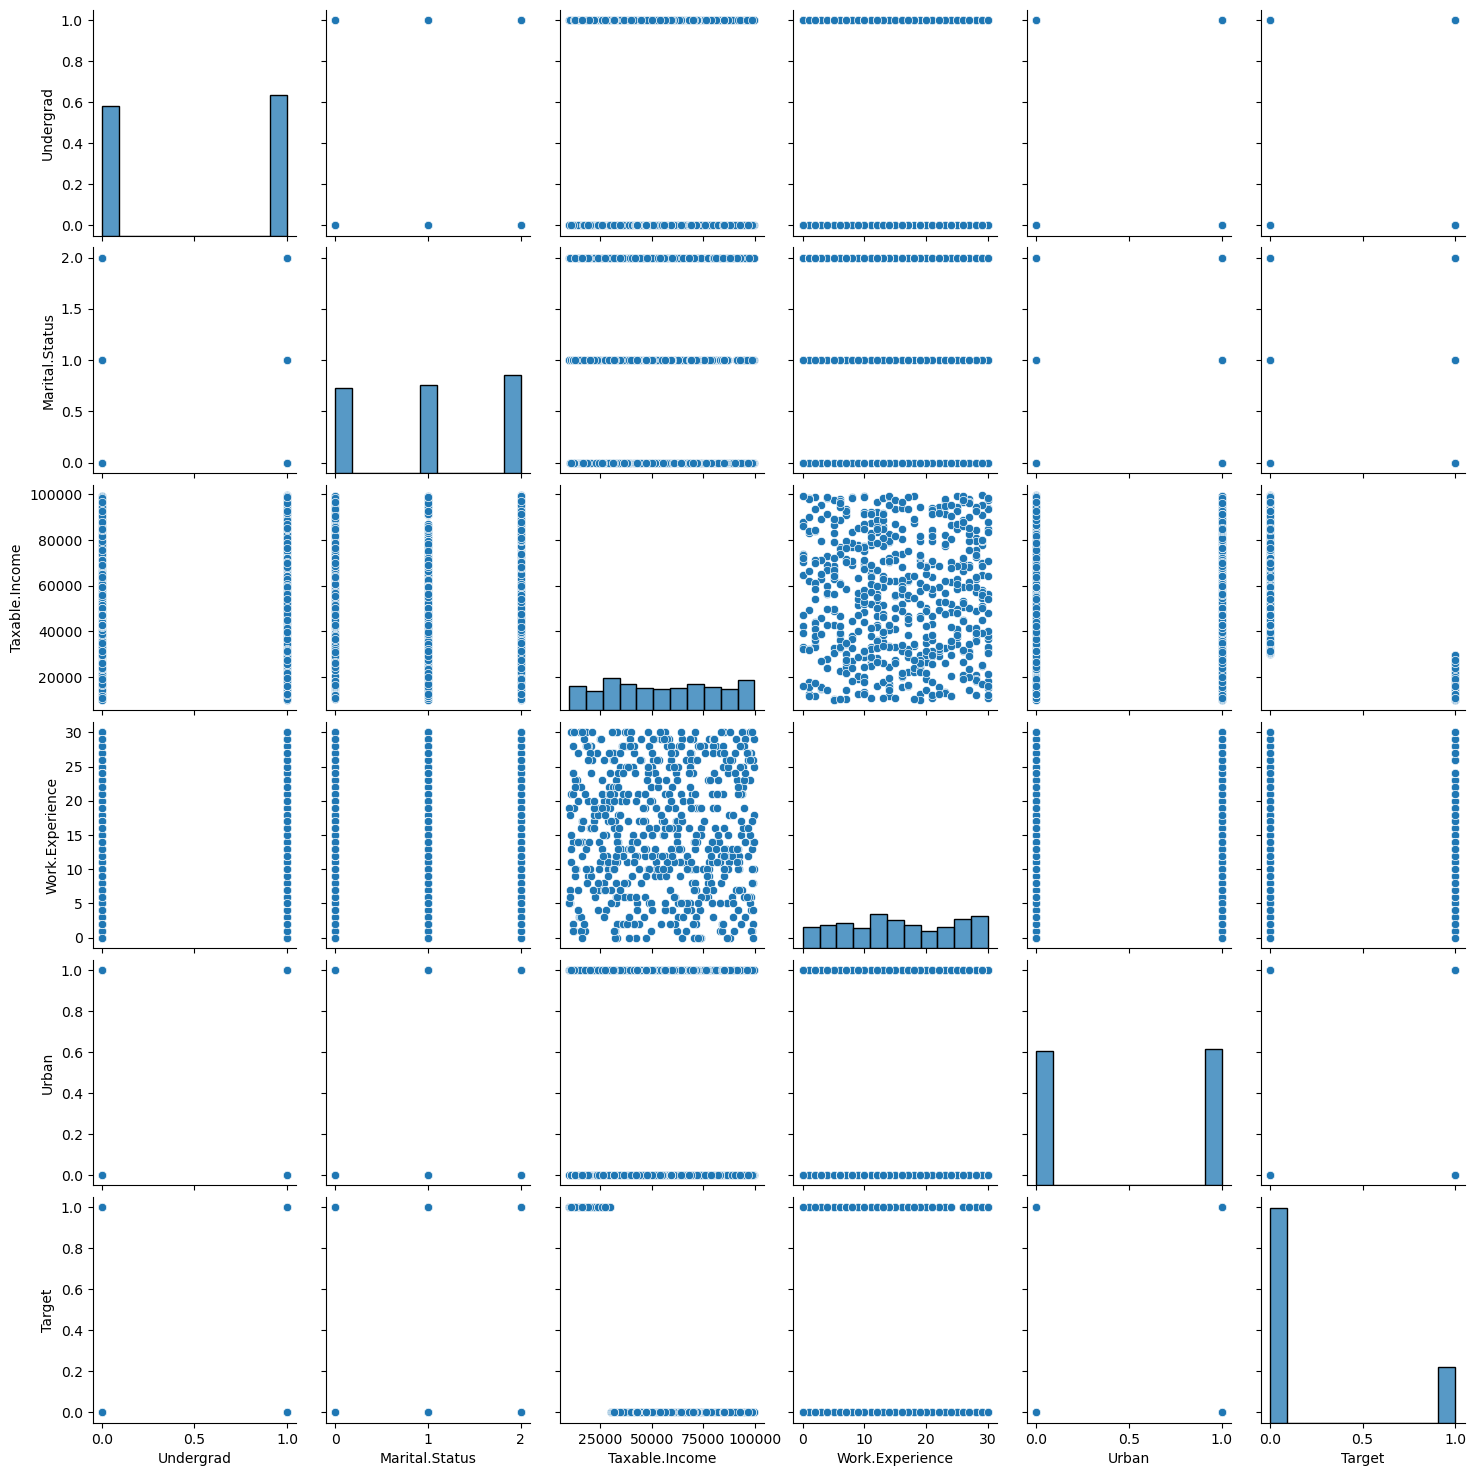

In [18]:
# Pair Plot
sns.pairplot(fraud_check2)

<Axes: xlabel='Taxable.Income', ylabel='Density'>

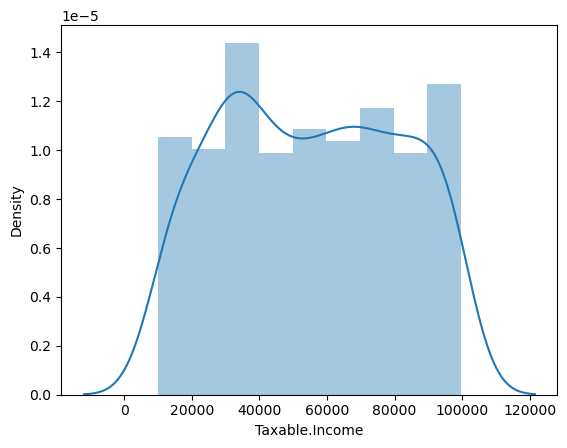

In [19]:
# Distplot of Taxable Income
sns.distplot(fraud_check2['Taxable.Income'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

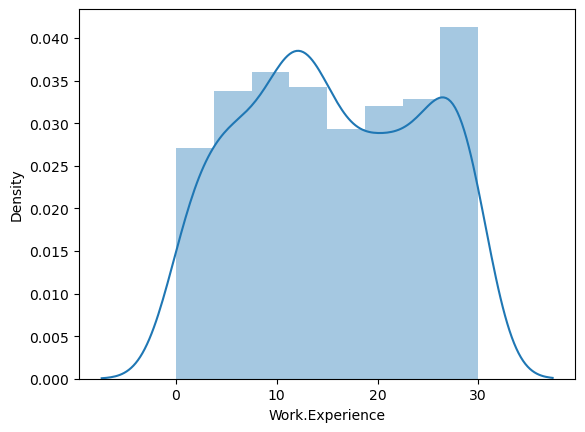

In [20]:
# Distplot of Work Experience
sns.distplot(fraud_check2['Work.Experience'])

<Axes: >

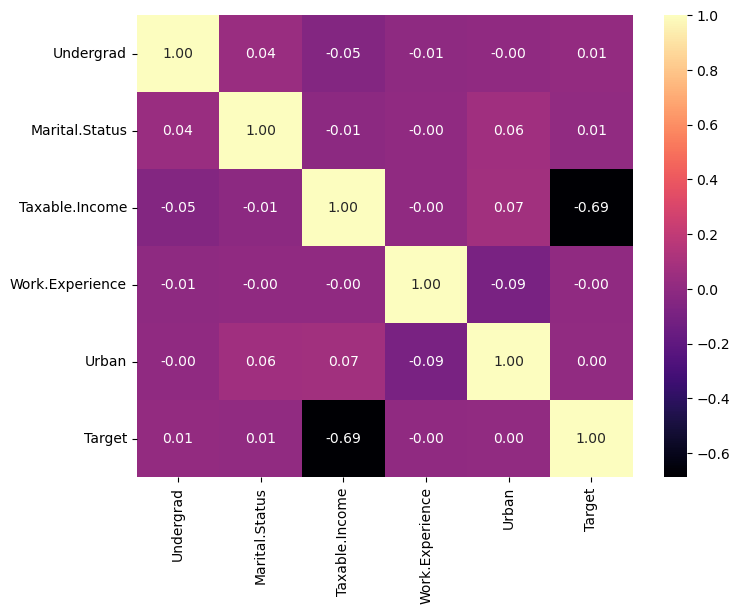

In [21]:
# Heatmap
plt.figure(figsize = (8, 6));
sns.heatmap(fraud_check2.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

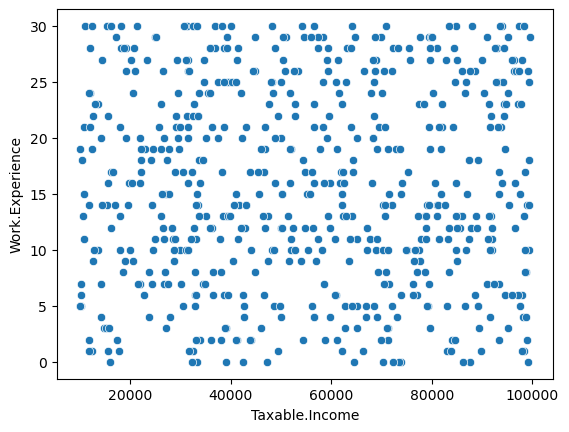

In [22]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud_check2)

In [46]:
x=fraud_check2.iloc[:,0:5]
y=fraud_check2[['Target']]
x.head(10)

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
5,0,0,33329,0,0
6,0,0,83357,8,1
7,1,2,62774,3,1
8,0,2,83519,12,1
9,1,0,98152,4,1


In [47]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Random Forest Classification

In [50]:
num_trees = 82
max_features = 4

In [51]:
kfold = KFold(n_splits=8, random_state=27, shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [52]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=82)

In [53]:
results = cross_val_score(model2, x, y, cv=kfold)
print("The Accuracy is ",results.mean())

The Accuracy is  0.9983333333333333


### Random Forest Regression

In [30]:
num_trees = 70
max_features = 5

In [31]:
kfold = KFold(n_splits=7, random_state=34, shuffle=True)
model3 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)

In [32]:
results = cross_val_score(model3, x, y, cv=kfold)
print("The Accuracy is ",results.mean())

The Accuracy is  0.9881418900462757


Hyperparameter Tuning - Randomized Search Cross Validation

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [55]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
# Random search of parameters
rf_random = RandomizedSearchCV(estimator=model2, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)

In [58]:
# Fit the random search model
rf_random.fit(X_train, y_train)
print("Best parameters from RandomizedSearchCV:", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters from RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [ ]:
Hyperparameter Tuning - Grid Search Cross Validation

In [59]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [61]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# Fit the grid search model
grid_search.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [64]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [65]:
# Final Model with Best Parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred_final))

Accuracy after hyperparameter tuning: 0.9916666666666667


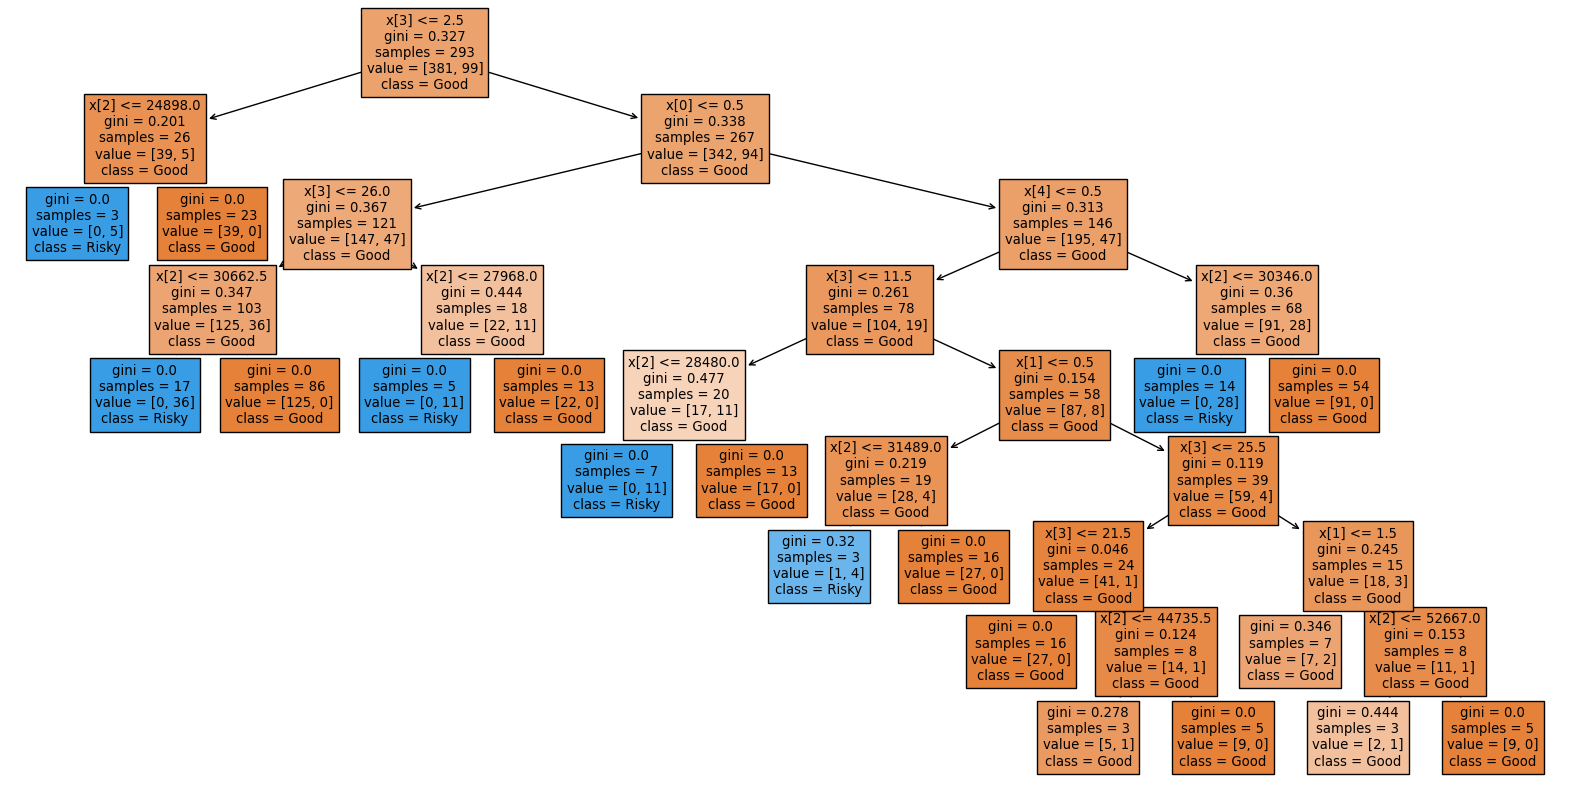

In [71]:
# Visualizing a tree
plt.figure(figsize=(20,10))
plot_tree(final_model.estimators_[0], filled=True, class_names=['Good', 'Risky'])
plt.show()